In [204]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [205]:
from scipy.optimize import curve_fit

In [206]:
def power_law(x, a, b):
    return a*np.power(x, b)

In [207]:
def Randwalk(steps):
    x=0
    y=0
    time = [x]
    pos  = [y]
    for i in range (1,steps):
        x+=1
        move = np.random.uniform(0,1)
        if move < 0.5:    
            y += -1  
        else:    
            y += 1
        time.append(x)
        pos.append(y)
    return [time,pos]

In [208]:
##Definicao dos parametros
steps = 10000
randwalks = 30
list_rankwalks= (randwalks,steps)
list_rankwalks = np.zeros(list_rankwalks)

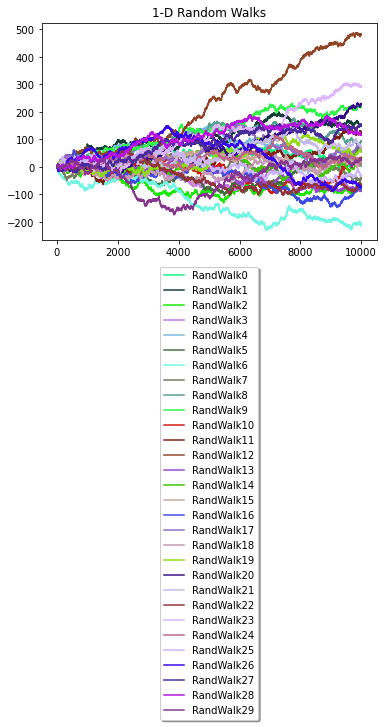

<Figure size 720x432 with 0 Axes>

In [236]:
for i in range (0,randwalks):
    Randwalk1 = Randwalk(steps)
    label = "RandWalk" + str(i)
    plt.plot(Randwalk1[0],Randwalk1[1],c=np.random.rand(3,), label = label)
    list_rankwalks[i,] = Randwalk1[1]
    time = Randwalk1[0]
plt.title("1-D Random Walks")
plt.legend(loc='upper center', bbox_to_anchor=(0.5,-0.1), fancybox=True, shadow=True)
plt.figure(figsize=(10,6))
plt.show()

In [226]:
###Calculando o vetor de variancia
variancia = np.var(list_rankwalks, axis=0)

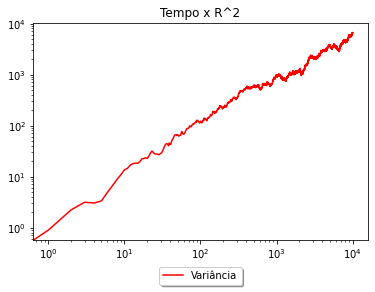

<Figure size 720x432 with 0 Axes>

In [227]:
plt.xscale('log')
plt.yscale('log')
plt.plot(time,variancia,c='r', label = 'Variância')
plt.title("Tempo x R^2")
plt.legend(loc='upper center', bbox_to_anchor=(0.5,-0.1), fancybox=True, shadow=True)
plt.figure(figsize=(10,6))
plt.show()

In [232]:
pars, cov = curve_fit(f=power_law, xdata=time, ydata=variancia)

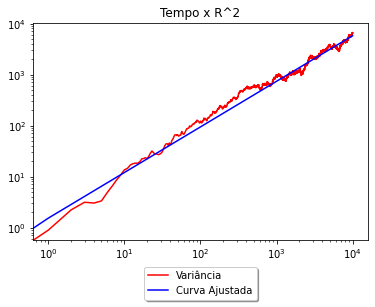

<Figure size 720x432 with 0 Axes>

In [233]:
plt.xscale('log')
plt.yscale('log')
plt.plot(time,variancia,c='r', label = 'Variância')
plt.plot(time,power_law(time,*pars),c='b', label = 'Curva Ajustada')
plt.title("Tempo x R^2")
plt.legend(loc='upper center', bbox_to_anchor=(0.5,-0.1), fancybox=True, shadow=True)
plt.figure(figsize=(10,6))
plt.show()

In [234]:
pars, cov = curve_fit(f=power_law, xdata=time, ydata=variancia, p0=[0, 1], bounds=(-np.inf, np.inf))

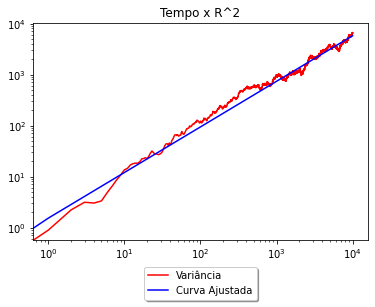

<Figure size 720x432 with 0 Axes>

In [235]:
plt.xscale('log')
plt.yscale('log')
plt.plot(time,variancia,c='r', label = 'Variância')
plt.plot(time,power_law(time,*pars),c='b', label = 'Curva Ajustada')
plt.title("Tempo x R^2")
plt.legend(loc='upper center', bbox_to_anchor=(0.5,-0.1), fancybox=True, shadow=True)
plt.figure(figsize=(10,6))
plt.show()